# Test Field

In [112]:
import datetime
import re
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

In [152]:
import final_func as fn
import importlib
importlib.reload(fn)

<module 'final_func' from '/Users/andrewmo/Documents/Docs - Jupiter/Projects/Class Individuals/2022Spring_Finals/final_func.py'>

In [140]:
# Load data
pit = pd.read_csv('data/pit_stops.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')

In [153]:
# Process the data files
merge_df = fn.merge_data([pit, results, status])
merge_df = fn.process_data(merge_df)
df_dict = fn.pit_stop_group(merge_df)

In [ ]:
fn.distribution_plot(df_dict)

In [120]:
df_front, df_back = fn.front_back_division(merge_df) # top 5

In [ ]:
fn.comparison_plot(df_front,df_back)

In [154]:
df_front, df_back = fn.front_back_division(merge_df, select_col='abs_deviation_mean') # top 5

In [156]:
def err_mean_plot(_df_front: pd.DataFrame, _df_back: pd.DataFrame, save_fig=False):
    """
    Hypothesis 3 Function

    :param _df_front:
    :param _df_back:
    :param save_fig:
    :return:
    """
    bins = np.linspace(0,1,50)
    color_bin = ['tab:blue', 'tab:orange', 'tab:red']
    color_bin2 = ['deepskyblue', 'crimson', 'lavender']

    _df_back = resample(_df_back, replace=True, n_samples=len(_df_front), random_state=123)
    plt.figure(figsize=(12,6))
    plt.hist(_df_back, bins, alpha=0.8, color=color_bin[2])
    plt.hist(_df_front, bins, alpha=0.8, color=color_bin[0])

    _df_front_mean = round(_df_front.mean(), ndigits=3)
    _df_back_mean = round(_df_back.mean(), ndigits=3)

    plt.axvline(x=_df_front_mean, color=color_bin2[0], linewidth=4)
    plt.axvline(x=_df_back_mean, color=color_bin2[1], linewidth=4)

    p_value = mannwhitneyu(_df_front, _df_back).pvalue
    print(f'Mann-Whitney U rank test p value={p_value}')

    if save_fig: plt.savefig(f'image/hypo3/err_mean.png', transparent=False)
    plt.show()

Mann-Whitney U rank test p value=0.001697749803686172


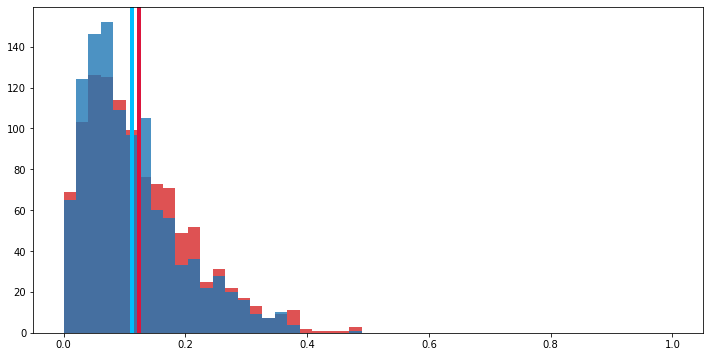

In [157]:
err_mean_plot(df_front,df_back)